#### Quick note

This creates all of the distance maps used in Fig. S7 _except_ for the part that actually looks like it's in the middle of being folded. 

To create that, we took the plot saved as `upper_half.pdf` and manipulated it in Photoshop to improve the visual aid.

We organized the overall figure using Adobe Illustrator.

#### Setup

In [1]:
import torch
from pathlib import Path
from ChromoGen import Conformations

2024-11-26 17:52:12.856335: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
coords_fp = '../../downloaded_data/conformations/ChromoGen/specific_regions/GM12878/chrom_X/start_idx_21420_cond_scale_5.0_rescaled_phi_8.0.pt'
map_index = 6
save_folder = './origami_transform/'
save = True


In [3]:
save_folder = Path(save_folder)
save_folder.mkdir(exist_ok=True, parents=True)

#### Load the conformations, sanity check on dimensions

In [4]:
dists = Conformations(coords_fp, drop_invalid_conformations = True)[map_index].distances
submap = dists.fold()
dists = dists
print(f'Distance shape:         {dists.shape}')
print(f'Folded distances shape: {submap.shape}') 


Distance shape:         torch.Size([1, 64, 64])
Folded distances shape: torch.Size([1, 2, 32, 32])


#### Plot

Some parameters to hold constant

In [5]:
vmin = 0
vmax = dists.values.max()

Plot the full map

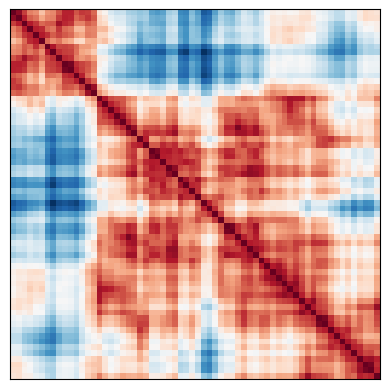

In [6]:
fig, ax, im, cmap = dists.plot(vmin=vmin, vmax=vmax)
cmap.remove()
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig(save_folder/'full_map.pdf', transparent=True)

Drop the lower triangle and plot

In [7]:
n = dists.num_beads
i,j = torch.triu_indices(n,n,1)
dists._values[0,j,i] = torch.nan

# Note that the first half of the diagonal is also dropped so that the dimensions work out correctly.
# Show that in the visualization
dists._values[0,range(n//2),range(n//2)] = torch.nan

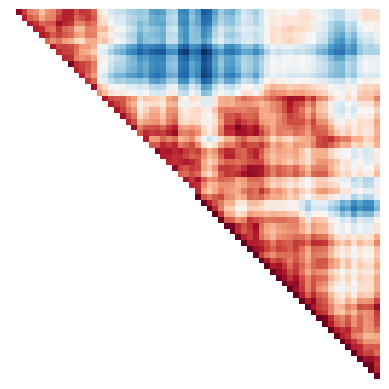

In [8]:
fig, ax, im, cmap = dists.plot(vmin=vmin, vmax=vmax)
cmap.remove()
ax.set_xlabel('')
ax.set_ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig(save_folder/'upper_half.pdf', transparent=True)

Show the two channels after folding

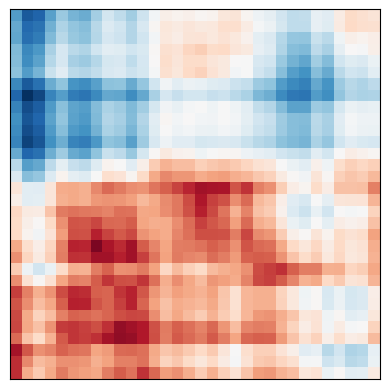

In [9]:
fig, ax, im, cmap = submap[0,0].plot(vmin=vmin,vmax=vmax)
cmap.remove()
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig(save_folder/'channel_one.pdf', transparent=True)

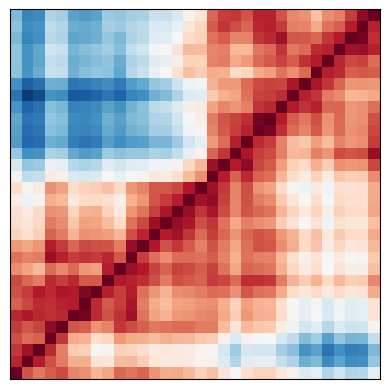

In [10]:
fig, ax, im, cmap = submap[0,1].plot(vmin=vmin,vmax=vmax)
cmap.remove()
ax.set_xlabel('')
ax.set_ylabel('')

fig.savefig(save_folder/'channel_two.pdf', transparent=True)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Genomic index', ylabel='Genomic index'>,
 <matplotlib.colorbar.Colorbar at 0x7f5350351090>)

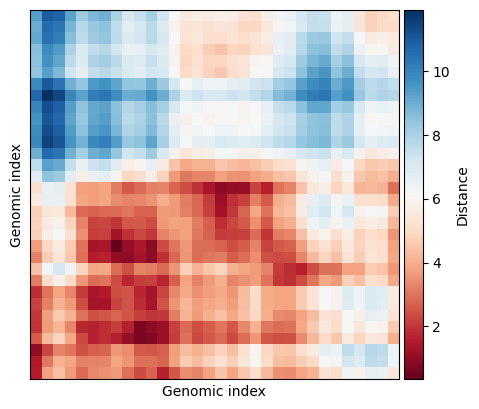

In [11]:
submap[0].plot(vmax=vmax)